# LISTA 2

### Zadanie 1
Korzystając z jednej z dostępnych bibliotek (np. OpenCV) przygotuj kod w języku Python, który załaduje a następnie zapisze wybrany obraz z/na dysku. 

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Wczytuję obraz i wyświetlam przy pomocy OpenCV i Matplotlib

(np.float64(-0.5), np.float64(692.5), np.float64(922.5), np.float64(-0.5))

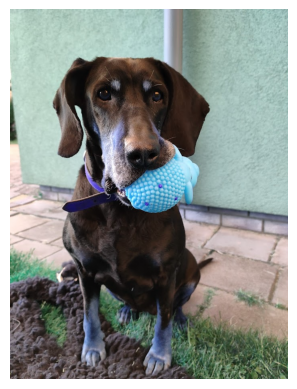

In [13]:
img = cv2.imread('duma.jpg', cv2.IMREAD_COLOR)

# Wyświetlanie przy pomocy OpenCV
cv2.imshow("image", img)
cv2.waitKey(0)

# Wyświetlanie przy pomocy matplotlib
plt.imshow(img)
plt.axis("off")

Ponieważ OpenCV operuje na formacie BGR, Matplotlib nie wyświetla obrazu tak, jak byśmy się tego spodziewali. Aby obraz wyglądał poprawnie, należy dokonać konwersji na format RGB.

(np.float64(-0.5), np.float64(692.5), np.float64(922.5), np.float64(-0.5))

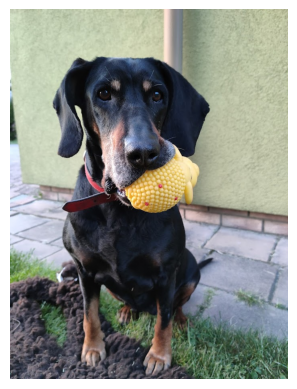

In [4]:
# Konwersja z formatu BGR na RGB
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Naprawione wyświetlanie z matplotlib
plt.imshow(RGB_img)
plt.axis("off")

In [5]:
# Zapisywanie obrazu
cv2.imwrite('nowa_duma.jpg', img)

True

### Zadanie 2
Przygotuj w języku Python kod, który wygeneruje histogram dla załadowanego obrazu z zadania 1. 

C:\Users\Justyna\AppData\Local\Temp\ipykernel_596\1905409903.py:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(RGB_img.ravel(), 256, [0,256])


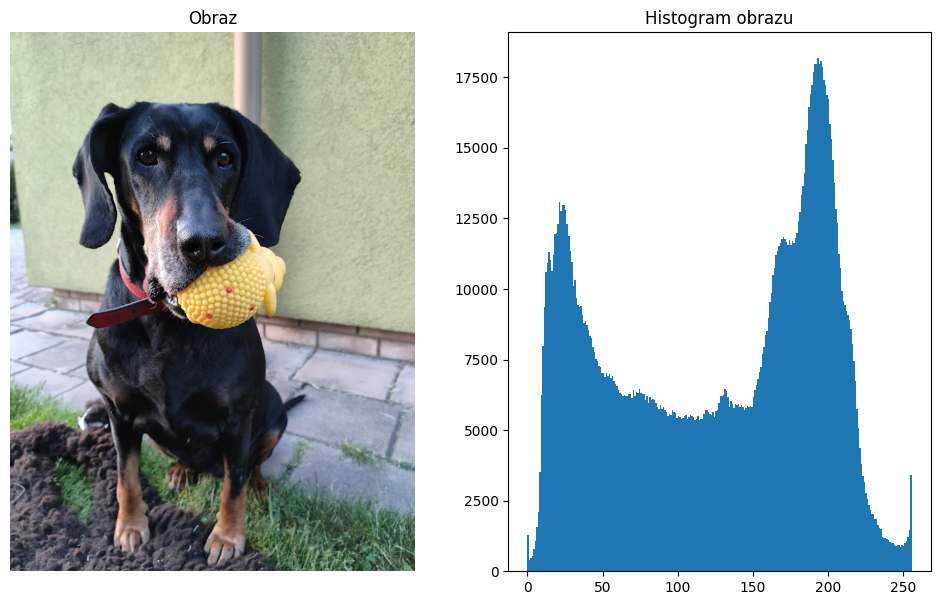

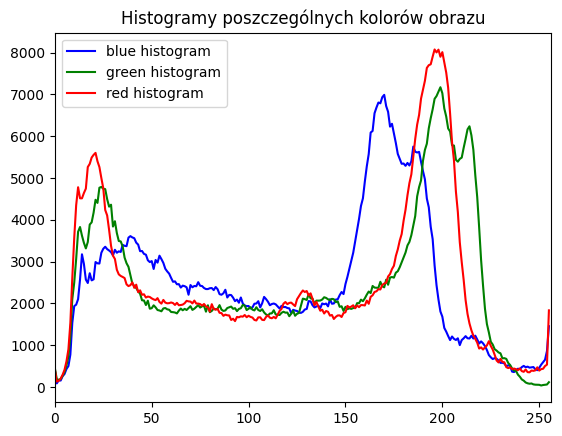

In [6]:
# Obraz
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.title("Obraz")
plt.imshow(RGB_img)
plt.axis("off")

# Histogram
plt.subplot(1, 2, 2)
plt.hist(RGB_img.ravel(), 256, [0,256])
plt.title("Histogram obrazu")
plt.show()

# Histogramy RGB
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.legend(['blue histogram', 'green histogram', 'red histogram'])
plt.title("Histogramy poszczególnych kolorów obrazu")
plt.show()

### Zadanie 3
Przygotuj w języku Python kod, który wygeneruje i zwizualizuje szum „sól i pieprz”.

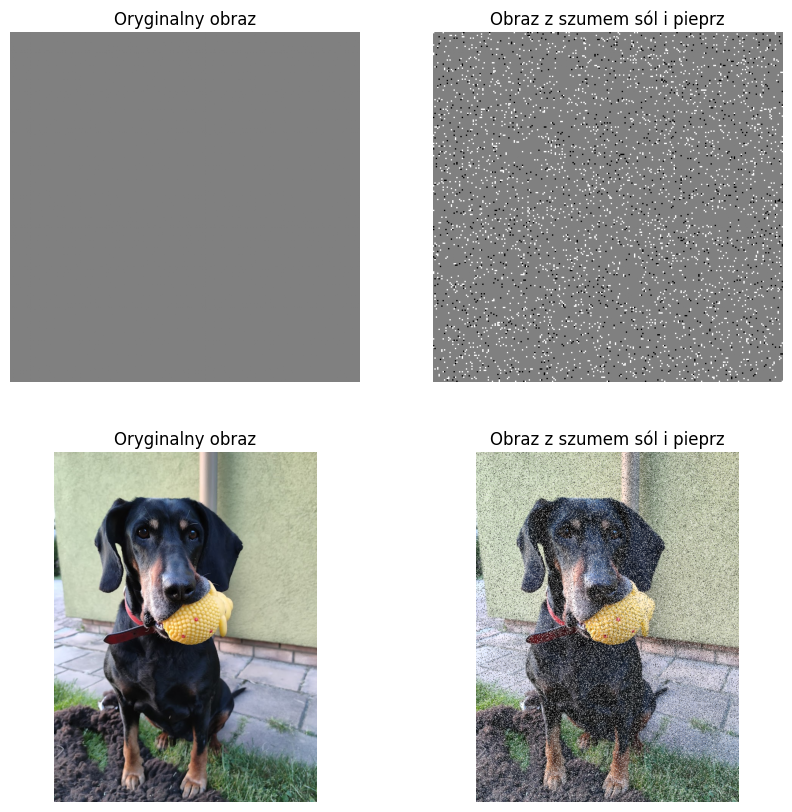

In [14]:
def add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy_image = np.copy(image)
    total_pixels = image.size
    
    # Dodanie soli (białe piksele)
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255
    
    # Dodanie pieprzu (czarne piksele)
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    
    return noisy_image


# Tworzenie obrazu w skali szarości
gray_image = np.full((256, 256), 128, dtype=np.uint8)

images = [gray_image, RGB_img]

# Parametry szumu
ilosc_soli = float(input("Podaj ilość soli: "))
ilosc_pieprzu = float(input("Podaj ilość pieprzu: "))

# Dodanie szumu
noisy_images = [add_salt_and_pepper_noise(image, salt_prob=ilosc_soli, pepper_prob=ilosc_pieprzu) for image in images]


# Wizualizacja
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Oryginalny obraz")
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Obraz z szumem sól i pieprz")
plt.imshow(noisy_images[0], cmap='gray')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Oryginalny obraz")
plt.imshow(images[1])
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Obraz z szumem sól i pieprz")
plt.imshow(noisy_images[1])
plt.axis("off")

plt.show()

### Zadanie 4
Przygotuj w języku Python kod, który obróci załadowany w zadaniu 1 obraz o 90 stopni 

In [15]:
# Obrót zgodnie z ruchem wskazówek zegara
img_rotated_clockwise = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

# Obrót przeciwnie do wskazówek zegara
img_rotated_ctrclockwise = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

rot_images = [img_rotated_clockwise, img_rotated_ctrclockwise]

# Wyświetlanie przy pomocy OpenCV
for i in rot_images:
    cv2.imshow("image", i)
    cv2.waitKey(0)
cv2.destroyAllWindows()

### Zadanie 5
Przygotuj w języku Python kod, który wygeneruje szum Riciana, Poissona i Rayleigha. Dla każdego z tych szumów przygotuj histogram. W tym celu wykorzystaj odpowiednie biblioteki w języku Python.

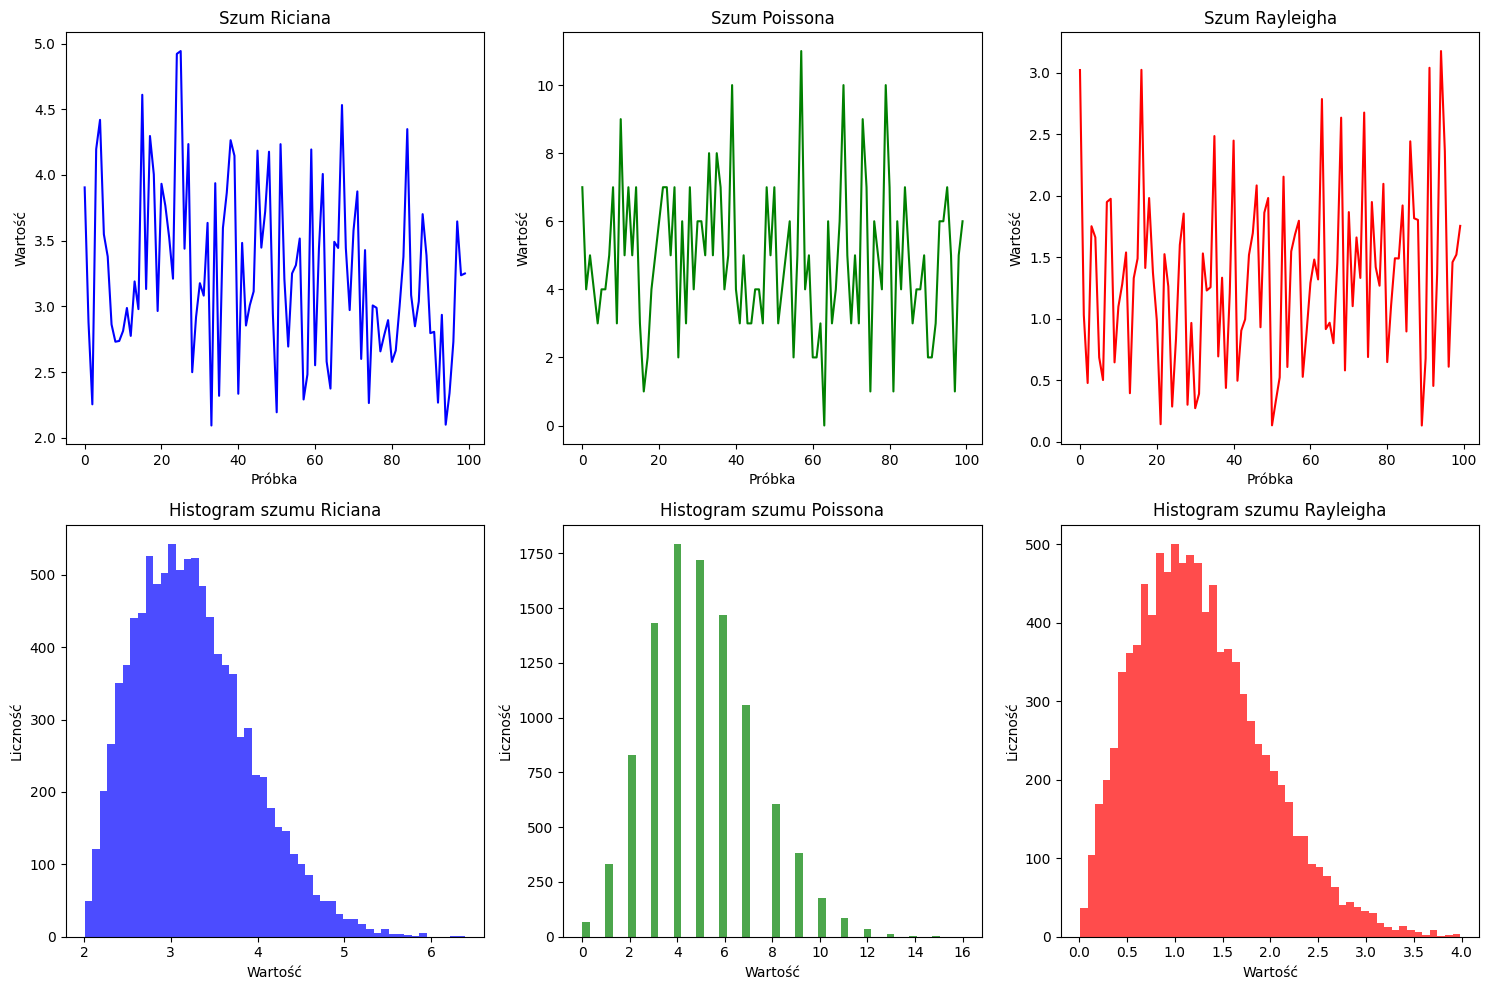

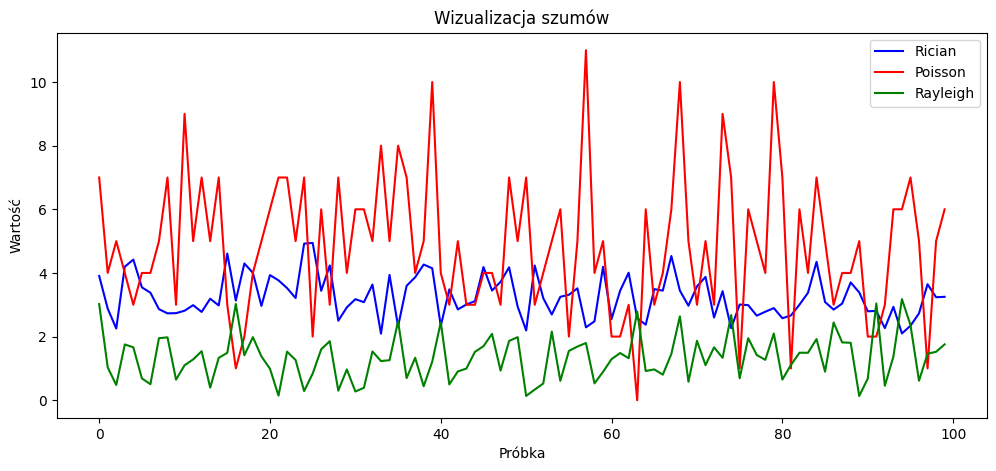

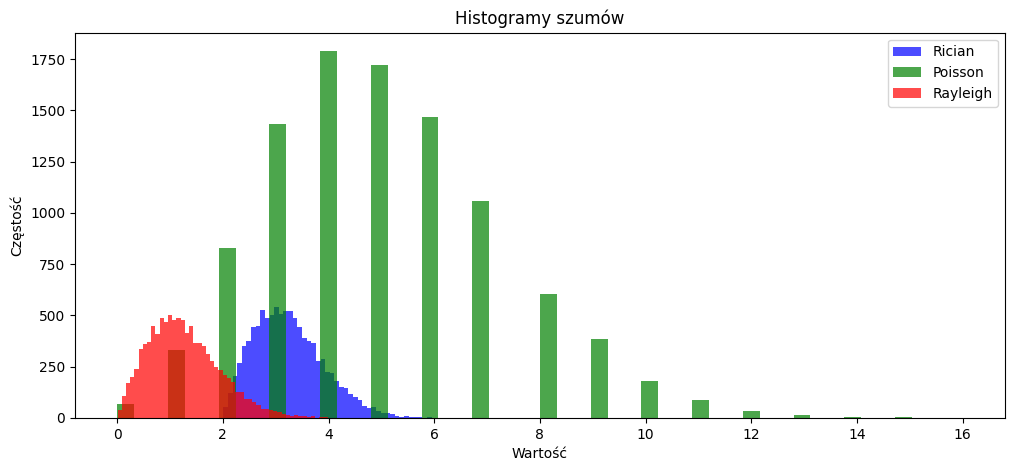

In [16]:
samples = 10000  # liczba próbek

# Szum Riciana
sigma = 1
v = 2
rician_noise = np.random.rayleigh(sigma, samples) + v

# Szum Poissona
lambda_poisson = 5
poisson_noise = np.random.poisson(lambda_poisson, samples)

# Szum Rayleigha
scale_rayleigh = 1
rayleigh_noise = np.random.rayleigh(scale_rayleigh, samples)

# Tworzenie wykresów
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].plot(rician_noise[:100], 'b')
axs[0, 0].set_title("Szum Riciana")
axs[0, 0].set_xlabel("Próbka")
axs[0, 0].set_ylabel("Wartość")

axs[0, 1].plot(poisson_noise[:100], 'g')
axs[0, 1].set_title("Szum Poissona")
axs[0, 1].set_xlabel("Próbka")
axs[0, 1].set_ylabel("Wartość")

axs[0, 2].plot(rayleigh_noise[:100], 'r')
axs[0, 2].set_title("Szum Rayleigha")
axs[0, 2].set_xlabel("Próbka")
axs[0, 2].set_ylabel("Wartość")

axs[1, 0].hist(rician_noise, bins=50, color='b', alpha=0.7)
axs[1, 0].set_title("Histogram szumu Riciana")
axs[1, 0].set_xlabel("Wartość")
axs[1, 0].set_ylabel("Liczność")

axs[1, 1].hist(poisson_noise, bins=50, color='g', alpha=0.7)
axs[1, 1].set_title("Histogram szumu Poissona")
axs[1, 1].set_xlabel("Wartość")
axs[1, 1].set_ylabel("Liczność")

axs[1, 2].hist(rayleigh_noise, bins=50, color='r', alpha=0.7)
axs[1, 2].set_title("Histogram szumu Rayleigha")
axs[1, 2].set_xlabel("Wartość")
axs[1, 2].set_ylabel("Liczność")

plt.tight_layout()
plt.show()

noises = [rician_noise, poisson_noise, rayleigh_noise]

plt.figure(figsize=(12, 5))
for noise in noises:
    if noise is rician_noise:
        plt.plot(rician_noise[:100], label="Rician", color='blue')  
    elif noise is rayleigh_noise:
        plt.plot(rayleigh_noise[:100], label="Rayleigh", color='green') 
    else:
        plt.plot(poisson_noise[:100], label="Poisson", color='red') 
plt.xlabel("Próbka")
plt.ylabel("Wartość")
plt.title("Wizualizacja szumów")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for noise in noises:
    if noise is rician_noise:
        plt.hist(rician_noise, bins=50, alpha=0.7, color='blue', label='Rician')  
    elif noise is poisson_noise:
        plt.hist(poisson_noise, bins=50, alpha=0.7, color='green', label='Poisson')
    else:
        plt.hist(rayleigh_noise, bins=50, alpha=0.7, color='red', label='Rayleigh')
plt.xlabel("Wartość")
plt.ylabel('Częstość')
plt.title("Histogramy szumów")
plt.legend()
plt.show()


Teraz dodam szumy do obrazu

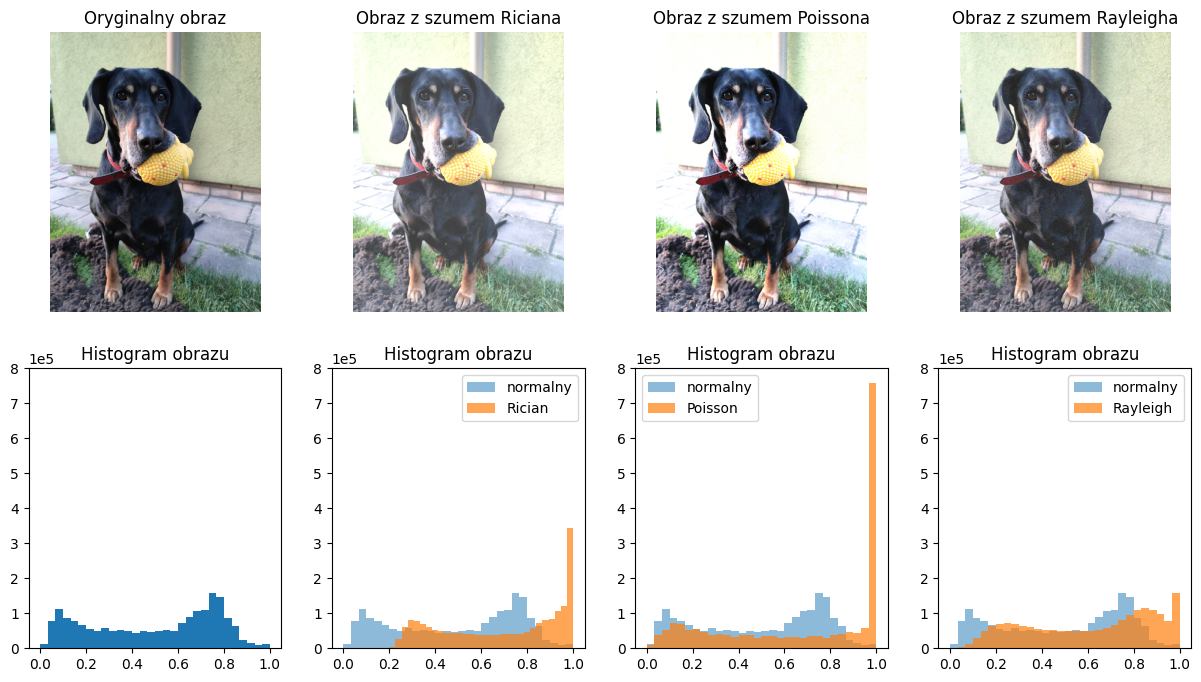

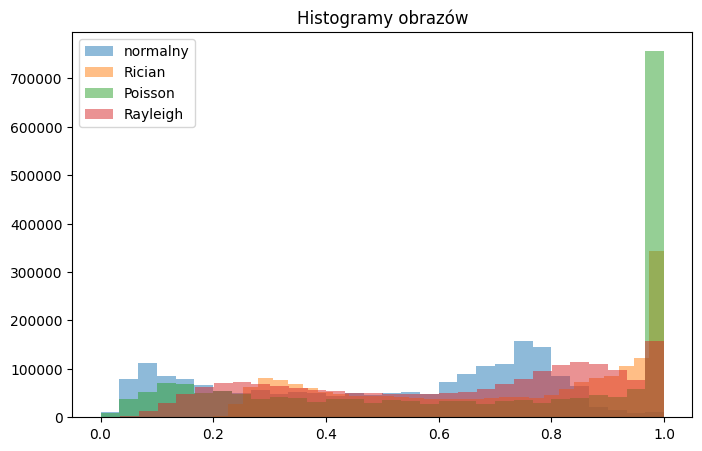

In [17]:
# Normalizacja obrazu do przedziału [0,1]
norm_img = RGB_img.astype(np.float32) / 255

# Generowanie szumów
sigma = 0.1  # Parametr dla szumu Riciana i Rayleigha
v = 0.2  # Parametr Riciana
rician_noise = np.sqrt((norm_img + v)**2 + (np.random.normal(0, sigma, norm_img.shape))**2)

poisson_noise = np.random.poisson(norm_img * 255) / 255 * 1.5  # 1.5 dla wzmocnienia

rayleigh_noise = norm_img + np.random.rayleigh(sigma, norm_img.shape)

# Ograniczenie wartości do zakresu [0,1]
rician_noise = np.clip(rician_noise, 0, 1)
poisson_noise = np.clip(poisson_noise, 0, 1)
rayleigh_noise = np.clip(rayleigh_noise, 0, 1)

# Tworzenie wykresów
plt.figure(figsize=(15, 8))
plt.subplot(2, 4, 1)
plt.title("Oryginalny obraz")
plt.imshow(norm_img)
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title("Obraz z szumem Riciana")
plt.imshow(rician_noise)
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title("Obraz z szumem Poissona")
plt.imshow(poisson_noise)
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title("Obraz z szumem Rayleigha")
plt.imshow(rayleigh_noise)
plt.axis("off")

# Histogramy
plt.subplot(2, 4, 5)
plt.hist(norm_img.ravel(), bins=30)
plt.title("Histogram obrazu")
plt.ylim([0, 800_000])
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

plt.subplot(2, 4, 6)
plt.hist(norm_img.ravel(), bins=30, alpha=0.5, label='normalny')
plt.hist(rician_noise.ravel(), bins=30, alpha=0.7, label='Rician')
plt.legend()
plt.ylim([0, 800_000])
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.title("Histogram obrazu")

plt.subplot(2, 4, 7)
plt.hist(norm_img.ravel(), bins=30, alpha=0.5, label='normalny')
plt.hist(poisson_noise.ravel(), bins=30, alpha=0.7, label='Poisson')
plt.legend()
plt.ylim([0, 800_000])
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.title("Histogram obrazu")

plt.subplot(2, 4, 8)
plt.hist(norm_img.ravel(), bins=30, alpha=0.5, label='normalny')
plt.hist(rayleigh_noise.ravel(), bins=30, alpha=0.7, label='Rayleigh')
plt.legend()
plt.ylim([0, 800_000])
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.title("Histogram obrazu")

plt.show()

imgs = [norm_img, rician_noise, poisson_noise, rayleigh_noise]
labels = ['normalny', 'Rician', 'Poisson', 'Rayleigh']

plt.figure(figsize=(8, 5))
for i, im in enumerate(imgs):
    plt.hist(im.ravel(), bins=30, alpha=0.5, label=labels[i])
plt.title("Histogramy obrazów")
plt.legend()
plt.show()